# Training Models

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

### Regression models

In [2]:
#Lets create a dataset for linear regressiion(y = 4 + 3x + noise)
x = 2 * np.random.rand(100,1)
y = 4 + 3 * x + np.random.randn(100,1)

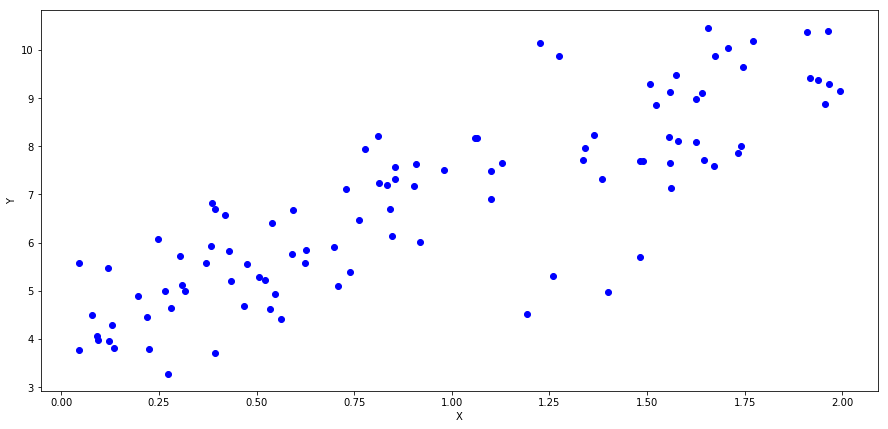

In [3]:
#plot for the figure
plt.figure(figsize=(15,7))
plt.plot(x,y,"bo")
plt.xlabel('X')
plt.ylabel('Y')

### Regression model using Normal equation

In [4]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y)
lin_reg.intercept_,lin_reg.coef_

(array([ 4.27178798]), array([[ 2.68889888]]))

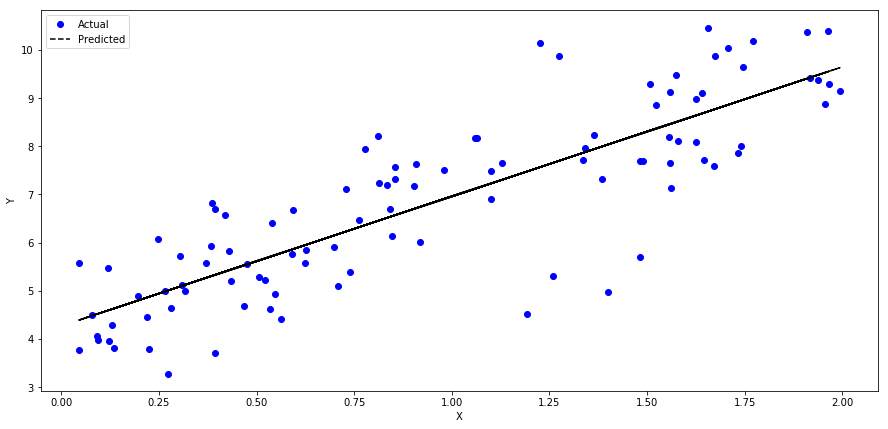

In [5]:
#plot for the figure
plt.figure(figsize=(15,7))
plt.plot(x,y,"bo",label="Actual")
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x,lin_reg.predict(x),"k--",label="Predicted")
plt.legend(loc="best")

## Regression model using Batch gradient descent 

In [6]:
#Sckitlearn doesnot contain any package
def batch_gradient_descent(train_X,train_y,n_iterations=1000,learning_rate=0.25):
    m = train_X.shape[0]
    train_X = np.c_[np.ones((m,1)),train_X]
    theta = np.random.randn(train_X.shape[1],1)#initialising the parameters
    for i in range(n_iterations):
        gradients = 2/m * train_X.T.dot(train_X.dot(theta)-train_y)
        theta = theta - learning_rate * gradients
        return theta    

In [7]:
batch_gradient_descent(x,y)

array([[ 4.69032395],
       [ 2.53303562]])

## Regression model using stochastic gradient descent

In [8]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=50,penalty=None,eta0=0.1)
sgd_reg.fit(x,y.ravel())#ravel chanfes the  one dimensional array to rank1 array
sgd_reg.intercept_,sgd_reg.coef_

(array([ 4.27703849]), array([ 2.68909212]))

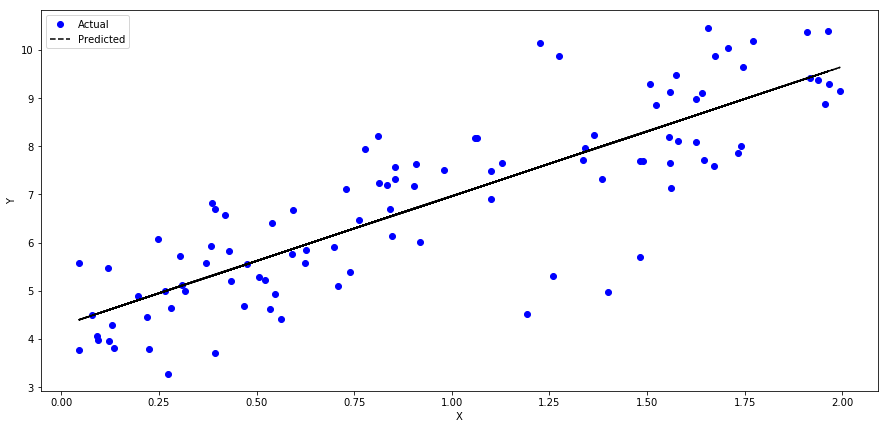

In [9]:
#plot for the figure
plt.figure(figsize=(15,7))
plt.plot(x,y,"bo",label="Actual")
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x,sgd_reg.predict(x),"k--",label="Predicted")
plt.legend(loc="best")

## Polynomial Regression

In [10]:
#creating a dataset for polynomial regression
m = 100
x =6 * np.random.rand(m,1) - 3
y = 0.5*x**2 + x + 2 + np.random.randn(m,1)

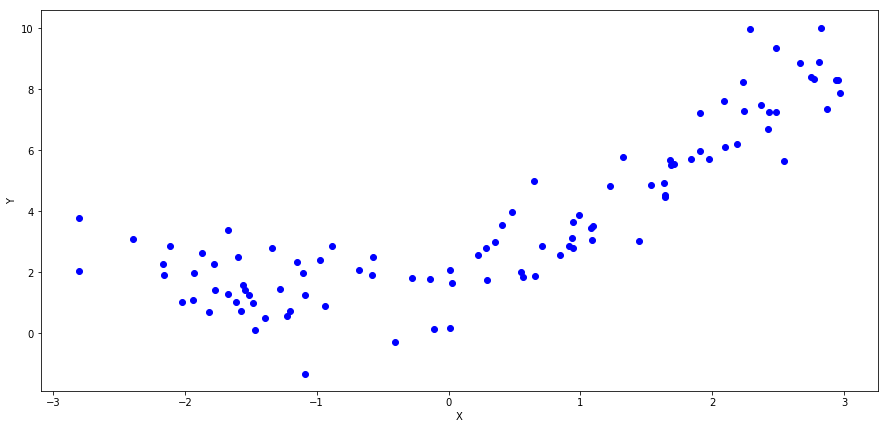

In [11]:
#plot for the figure
plt.figure(figsize=(15,7))
plt.plot(x,y,"bo")
plt.xlabel('X')
plt.ylabel('Y')

In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2 ,include_bias=False)
x_poly = poly_features.fit_transform(x)
x[0],x_poly[0]

(array([-0.58348788]), array([-0.58348788,  0.34045811]))

In [13]:
lin_reg.fit(x_poly,y)
lin_reg.intercept_,lin_reg.coef_

(array([ 1.97675984]), array([[ 1.05918619,  0.48444772]]))

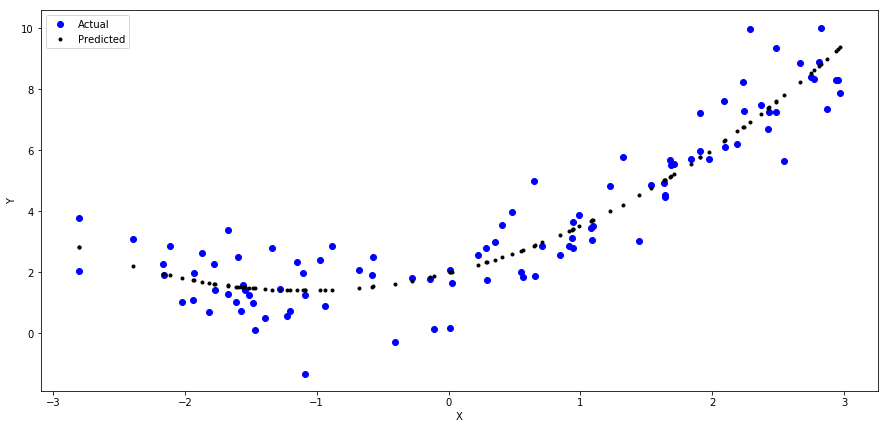

In [14]:
#plot for the figure
plt.figure(figsize=(15,7))
plt.plot(x,y,"bo",label="Actual")
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x,lin_reg.predict(x_poly),"k.",label="Predicted")
plt.legend(loc="best")

### Increasing the degree of polynomial will overfit the model

## Regularized linear models

### Ridge regression(L2 norm) in linear regression

In [15]:
#fitting a linaer model using ridge regression

#Lets create a dataset for linear regressiion(y = 4 + 3x + noise)

x = 2 * np.random.rand(100,1)
y = 4 + 3 * x + np.random.randn(100,1)
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha= 1 ,solver="cholesky") #alpha - regularisation parameter , solver - solving the cost function
ridge_reg.fit(x,y)
ridge_reg.intercept_,ridge_reg.coef_

(array([ 4.55870212]), array([[ 2.63531483]]))

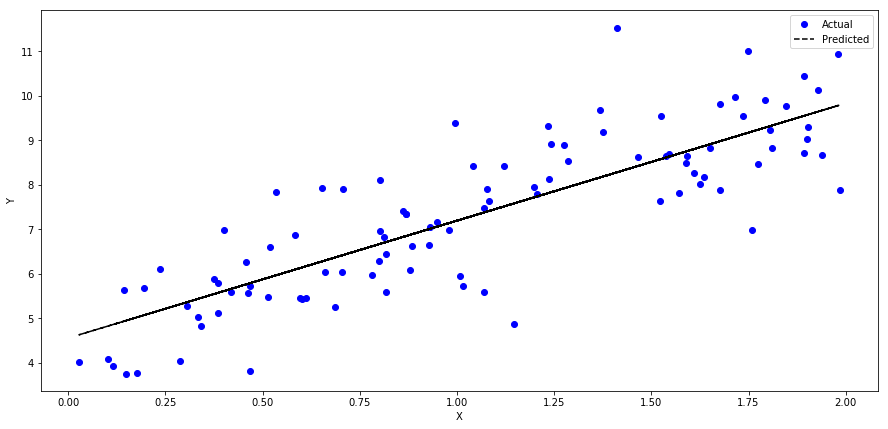

In [16]:
#plot for the figure
plt.figure(figsize=(15,7))
plt.plot(x,y,"bo",label="Actual")
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x,ridge_reg.predict(x),"k--",label="Predicted")
plt.legend(loc="best")

In [17]:
#fitting a non -linaer model using ridge regression creating a dataset,polynomial regression then standard scaling
m = 100
x =6 * np.random.rand(m,1) - 3
y = 0.5*x**2 + x + 2 + np.random.randn(m,1)

from sklearn.preprocessing import PolynomialFeatures #polynomial features extraction
poly_features = PolynomialFeatures(degree = 10 ,include_bias=False)
x_poly = poly_features.fit_transform(x)

from sklearn.preprocessing import StandardScaler#using standard scaler
scaler = StandardScaler()
x_std = scaler.fit_transform(x_poly)

In [18]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha= 1 ,solver="cholesky") #alpha - regularisation parameter , solver - solving the cost function
ridge_reg.fit(x_std,y)
ridge_reg.intercept_,ridge_reg.coef_

(array([ 3.32388446]),
 array([[ 1.69045652,  1.47056155,  0.04933579,  0.20773124,  0.10514189,
         -0.13634361, -0.02348899, -0.12470978, -0.2885839 ,  0.0711005 ]]))

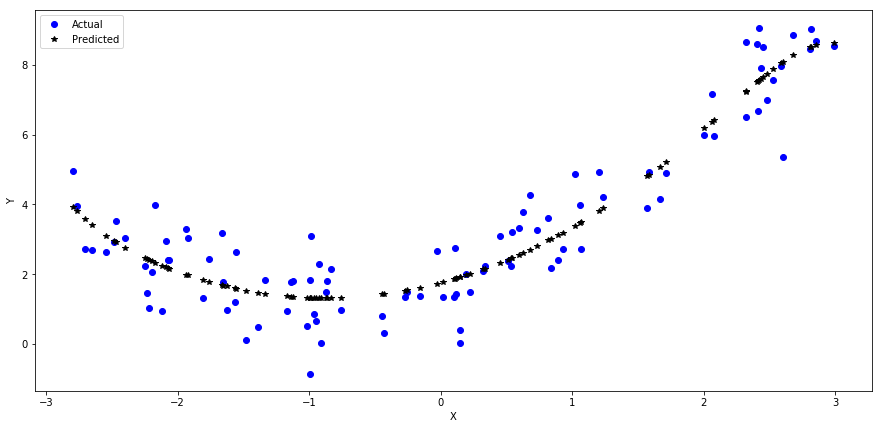

In [19]:
#plot for the figure
plt.figure(figsize=(15,7))
plt.plot(x,y,"bo",label="Actual")
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x,ridge_reg.predict(x_std),"k*",label="Predicted")
plt.legend(loc="best")

## With increase of alpha regularisation increases,hence it reduces variance(overfitting) and increases bias(underfitting) 

### Ridge regression in stochastic gradient

In [20]:
from sklearn.preprocessing import PolynomialFeatures #polynomial features extraction
poly_features = PolynomialFeatures(degree = 10 ,include_bias=False)
x_poly = poly_features.fit_transform(x)

from sklearn.preprocessing import StandardScaler#using standard scaler
scaler = StandardScaler()
x_std = scaler.fit_transform(x_poly)

In [21]:
sgd_reg = SGDRegressor(penalty="l2",alpha=0.7)
sgd_reg.fit(x_std,y.ravel())
sgd_reg.intercept_,sgd_reg.coef_

(array([ 2.5368475]),
 array([ 0.53008113,  0.43161347,  0.32946491,  0.33212357,  0.1997568 ,
         0.23261389,  0.10102842,  0.1465164 ,  0.02236142,  0.07622274]))

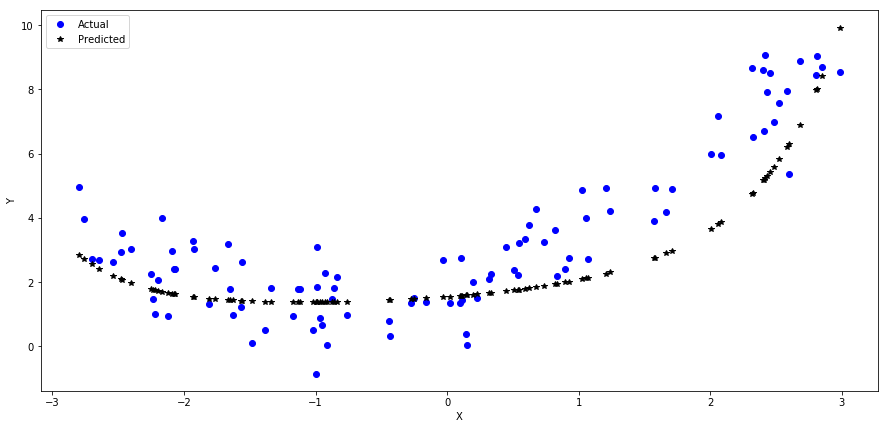

In [22]:
#plot for the figure
plt.figure(figsize=(15,7))
plt.plot(x,y,"bo",label="Actual")
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x,sgd_reg.predict(x_std),"k*",label="Predicted")
plt.legend(loc="best")

## Lasso Regression(L1 norm) in linear regression

In [23]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1) #alpha-> regularisation parameter
lasso_reg.fit(x_std,y)
lasso_reg.intercept_,lasso_reg.coef_

(array([ 3.32388446]),
 array([ 1.52765529,  1.38636997,  0.        ,  0.        ,  0.        ,
         0.        , -0.        ,  0.        , -0.        ,  0.        ]))

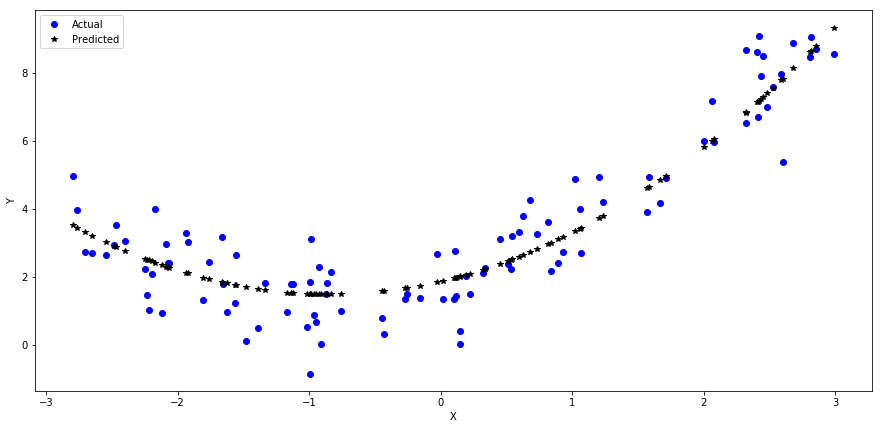

In [24]:
#plot for the figure
plt.figure(figsize=(15,7))
plt.plot(x,y,"bo",label="Actual")
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x,lasso_reg.predict(x_std),"k*",label="Predicted")
plt.legend(loc="best")

### Lasso Regression in stochastic gradient descent

In [29]:
from sklearn.preprocessing import PolynomialFeatures #polynomial features extraction
poly_features = PolynomialFeatures(degree = 10 ,include_bias=False)
x_poly = poly_features.fit_transform(x)

from sklearn.preprocessing import StandardScaler#using standard scaler
scaler = StandardScaler()
x_std = scaler.fit_transform(x_poly)

In [38]:
sgd_reg = SGDRegressor(penalty="l1",alpha=0.0001)
sgd_reg.fit(x_std,y.ravel())
sgd_reg.intercept_,sgd_reg.coef_

(array([ 2.50048661]),
 array([ 0.70617004,  0.55073959,  0.39410808,  0.3904535 ,  0.19930272,
         0.24317833,  0.05686738,  0.12259808, -0.05079587,  0.02887596]))

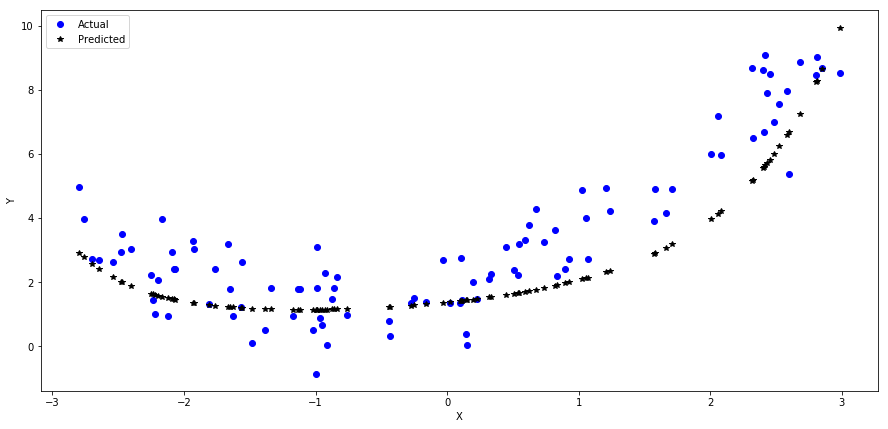

In [39]:
#plot for the figure
plt.figure(figsize=(15,7))
plt.plot(x,y,"bo",label="Actual")
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x,sgd_reg.predict(x_std),"k*",label="Predicted")
plt.legend(loc="best")

## Elastic Net in Linear Regression

In [40]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha = 0.1,l1_ratio = 0.5) #alpha->regularisation parameter,l1_ratio->mix ratio (r =0,1->Ridge,Lasso)
elastic_net.fit(x_std,y)
elastic_net.intercept_,elastic_net.coef_

(array([ 3.32388446]),
 array([ 1.4472745 ,  1.13733185,  0.04326827,  0.25394826,  0.        ,
         0.        , -0.        ,  0.        , -0.        , -0.        ]))

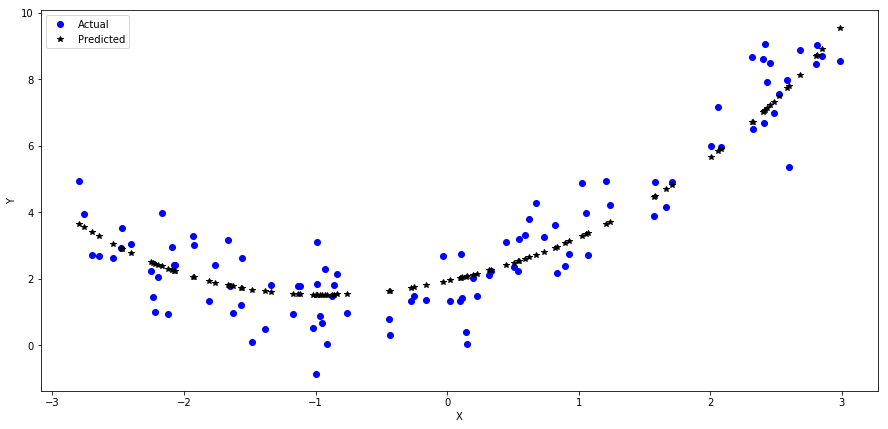

In [41]:
#plot for the figure
plt.figure(figsize=(15,7))
plt.plot(x,y,"bo",label="Actual")
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x,elastic_net.predict(x_std),"k*",label="Predicted")
plt.legend(loc="best")

### Elastic net in stochastic gradient descent

In [48]:
sgd_reg = SGDRegressor(penalty="elasticnet",alpha=0.5,l1_ratio=0.5)
sgd_reg.fit(x_std,y.ravel())
sgd_reg.intercept_,sgd_reg.coef_

(array([ 2.50596119]),
 array([ 0.5533471 ,  0.41563426,  0.3250686 ,  0.32244479,  0.18565526,
         0.22458443,  0.08223565,  0.13753411,  0.        ,  0.06473562]))

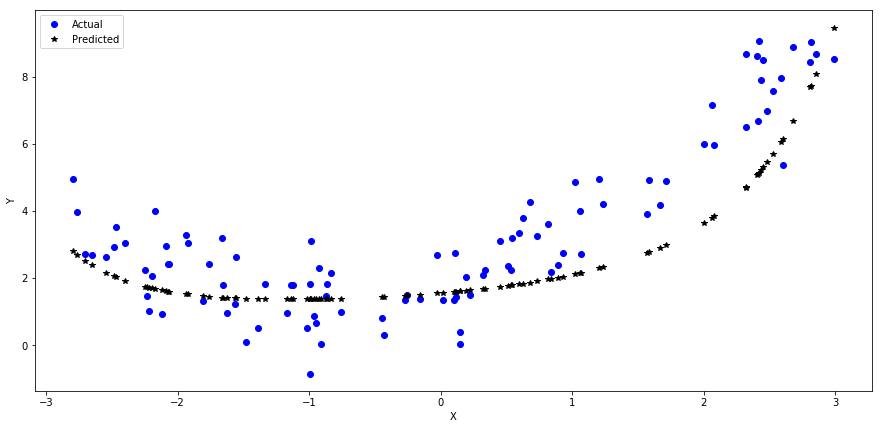

In [49]:
#plot for the figure
plt.figure(figsize=(15,7))
plt.plot(x,y,"bo",label="Actual")
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x,sgd_reg.predict(x_std),"k*",label="Predicted")
plt.legend(loc="best")

## Logistic Regression

In [50]:
#Iris dataset
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [63]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

In [74]:
iris_data = DataFrame(iris['data'])
iris_data.columns = iris["feature_names"]
iris_data["Species"] = np.where(iris["target"]==0,'setosa',np.where(iris["target"]==1,'versicolor','virginica'))
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [92]:
train_x = iris_data.iloc[:,3]#petal width only
train_y = (iris["target"]==2).astype(np.int) # 1 if iris virginica, else 0

In [93]:
train_x = train_x.values.reshape(len(train_x),1)
train_y = train_y.reshape(len(train_y),1)

In [96]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(train_x,train_y.ravel()) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

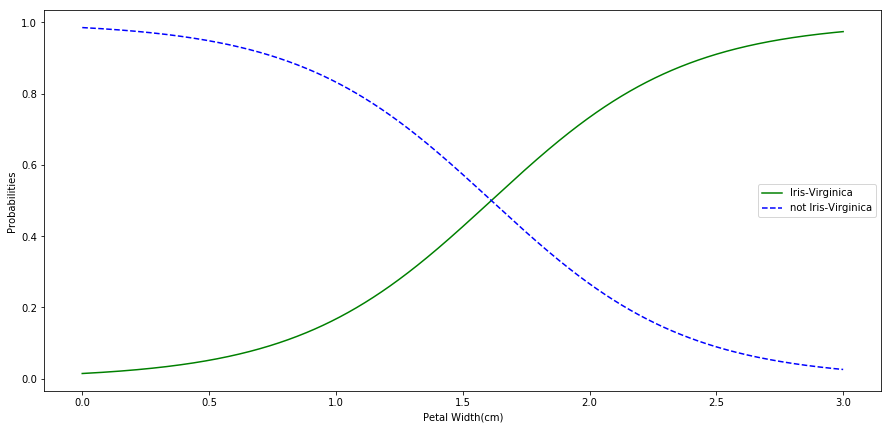

In [101]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.figure(figsize=(15,7))
plt.plot(X_new,y_proba[:,1],'g-',label="Iris-Virginica")
plt.plot(X_new,y_proba[:,0],"b--",label="not Iris-Virginica")
plt.xlabel("Petal Width(cm)")
plt.ylabel("Probabilities")
plt.legend(loc="best")

In [110]:
from sklearn.metrics import accuracy_score
accuracy_score(train_y,log_reg.predict(train_x))

0.95999999999999996

In [115]:
train_x = iris_data.iloc[:,2:4] #petal width and petal Length only
train_y = (iris["target"]==2).astype(np.int) # 1 if iris virginica, else 0

In [116]:
train_x = train_x.values.reshape(len(train_x),2)
train_y = train_y.reshape(len(train_y),1)

In [117]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(train_x,train_y.ravel()) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [118]:
from sklearn.metrics import accuracy_score
accuracy_score(train_y,log_reg.predict(train_x))

0.96666666666666667

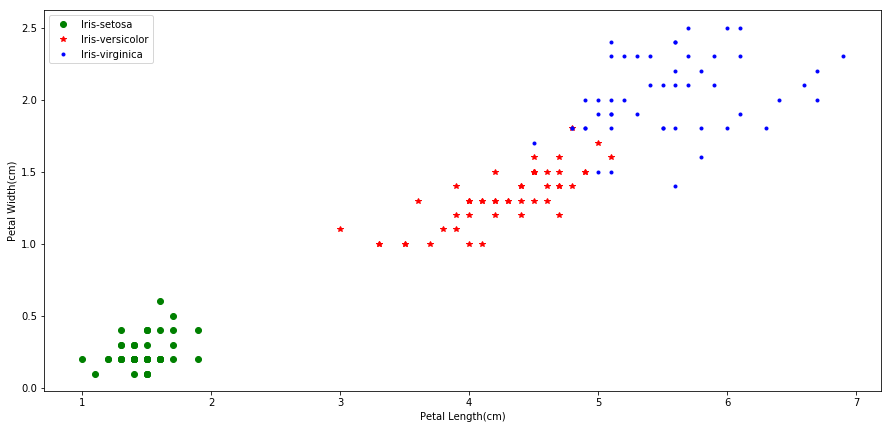

In [130]:
plt.figure(figsize=(15,7))
plt.plot(train_x[:50,0],train_x[:50,1],'go',label="Iris-setosa")
plt.plot(train_x[50:100,0],train_x[50:100,1],'r*',label="Iris-versicolor")
plt.plot(train_x[100:150,0],train_x[100:150,1],'b.',label="Iris-virginica")
plt.xlabel("Petal Length(cm)")
plt.ylabel("Petal Width(cm)")
plt.legend(loc="best")

In [131]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(penalty="l2",C=0.5,solver='liblinear')#C-> inverse of alpha(regularisation parameter) 
log_reg.fit(train_x,train_y.ravel()) 

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [132]:
from sklearn.metrics import accuracy_score
accuracy_score(train_y,log_reg.predict(train_x))

0.95999999999999996

## Softmax Regression

In [133]:
train_x = iris_data.iloc[:,2:4] #petal width and petal Length only
train_y = iris["target"] 

In [136]:
from sklearn.linear_model import LogisticRegression
softmax_reg = LogisticRegression(multi_class='multinomial',solver='lbfgs',C=10)#C-> inverse of alpha(regularisation parameter) 
softmax_reg.fit(train_x,train_y) 

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [137]:
from sklearn.metrics import accuracy_score
accuracy_score(train_y,softmax_reg.predict(train_x))

0.95999999999999996